# Introduction
The purpose of this notebook is to visualize our data as a precurseor to preprocessing
We look at:

- Nulls and type
- Description of Numeric data
- Description of Categorical data
- Plots of parameter distributions (with some bivariate plots)
- Correlation of numerical parameters
- Clusters of numerical correlation (heatmap / cluster plot)
- Bivariate distributions with Target variable & Categorical overlay


In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

pd.set_option('display.max_columns',None)

%matplotlib inline

In [119]:
path = '/Users/jonbruno/Documents/Python/Kaggle/Housing/data/'
df = pd.read_csv(path+'train.csv')

## Description

In [8]:
display(df.shape)
display(df.info())

(1460, 81)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

None

In [11]:
df.describe?

### numeric data

In [19]:
df.describe(include=[np.number])

/Users/jonbruno/anaconda/envs/python3/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,NaN,7553.500000,5.000000,5.000000,1954.000000,1967.000000,NaN,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,NaN,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,NaN,9478.500000,6.000000,5.000000,1973.000000,1994.000000,NaN,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,NaN,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,NaN,11601.500000,7.000000,6.000000,2000.000000,2004.000000,NaN,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,NaN,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### categorical data

In [18]:
df.describe(exclude=[np.number])

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1452,1460,1460,1460,1423,1423,1422,1423,1422,1460,1460,1460,1459,1460,1460,770,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,8,5,8,6,8,15,16,4,4,5,6,4,4,4,6,6,6,5,2,5,4,7,5,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,1141,1434,515,504,864,906,1282,647,649,1311,953,430,1256,1428,741,1365,1334,735,1360,380,870,605,1311,1326,1340,3,157,49,1267,1198


## Distributions of Numeric values

['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtFinSF1']
['BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF', 'EnclosedPorch']
['Fireplaces', 'FullBath', 'GarageArea', 'GarageCars', 'GarageYrBlt']
['GrLivArea', 'HalfBath', 'KitchenAbvGr', 'LotArea', 'LotFrontage']
['LowQualFinSF', 'MSSubClass', 'MasVnrArea', 'MiscVal', 'MoSold']
['OpenPorchSF', 'OverallCond', 'OverallQual', 'PoolArea', 'SalePrice']
['ScreenPorch', 'TotRmsAbvGrd', 'TotalBsmtSF', 'WoodDeckSF', 'YearBuilt']


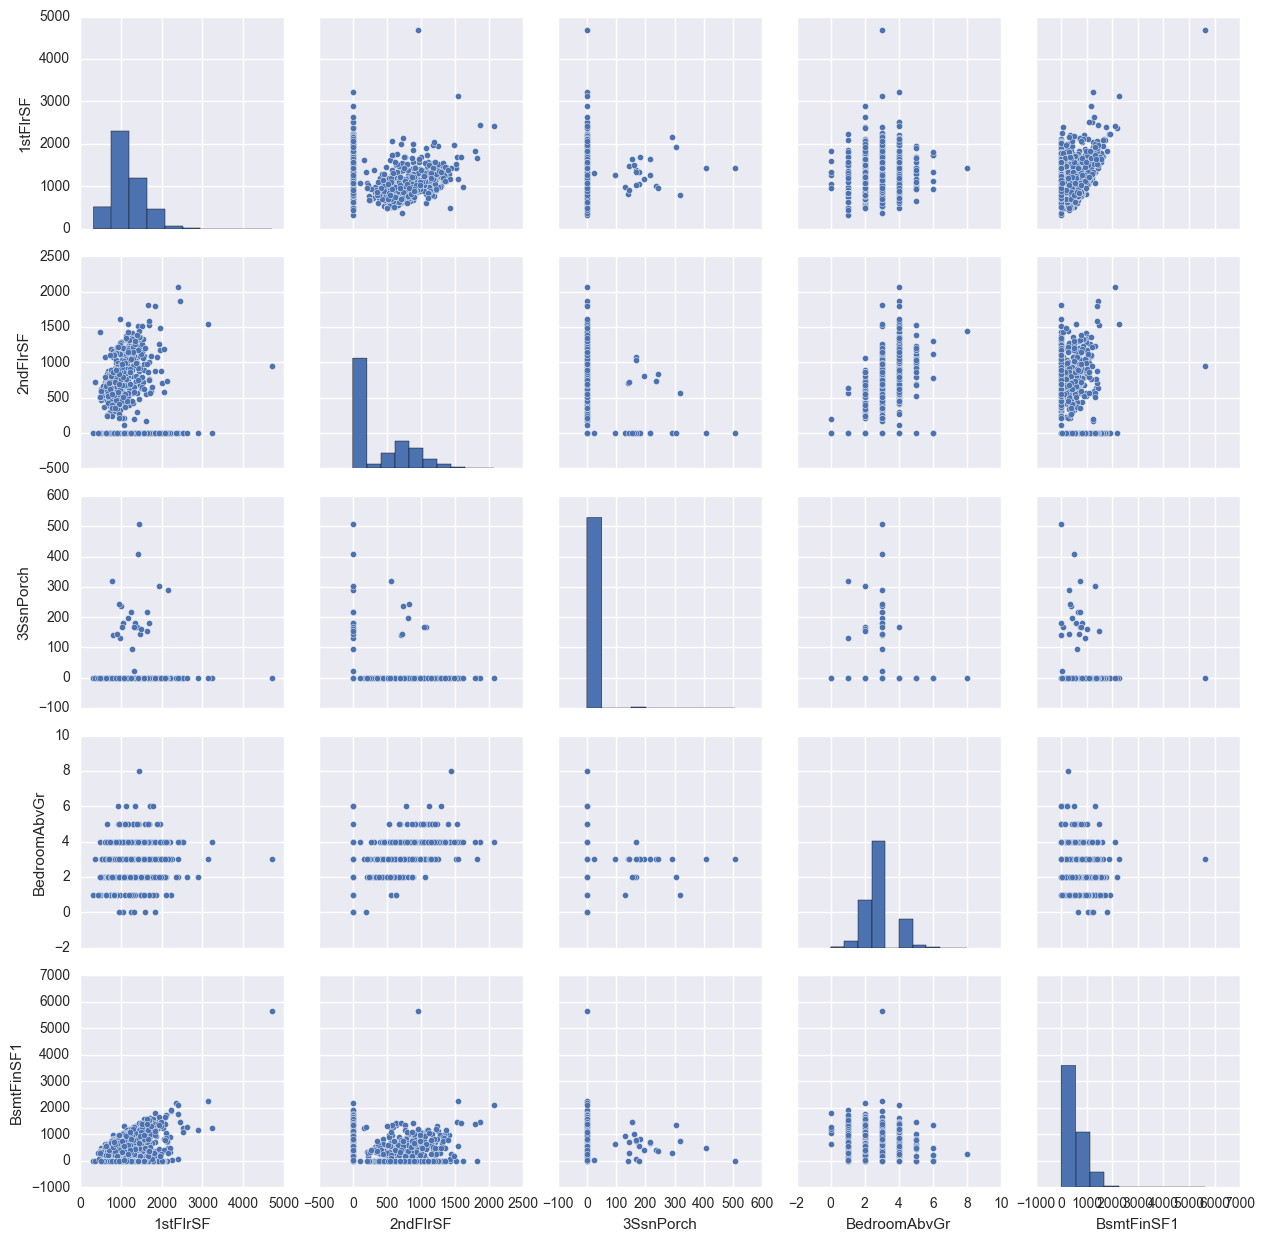

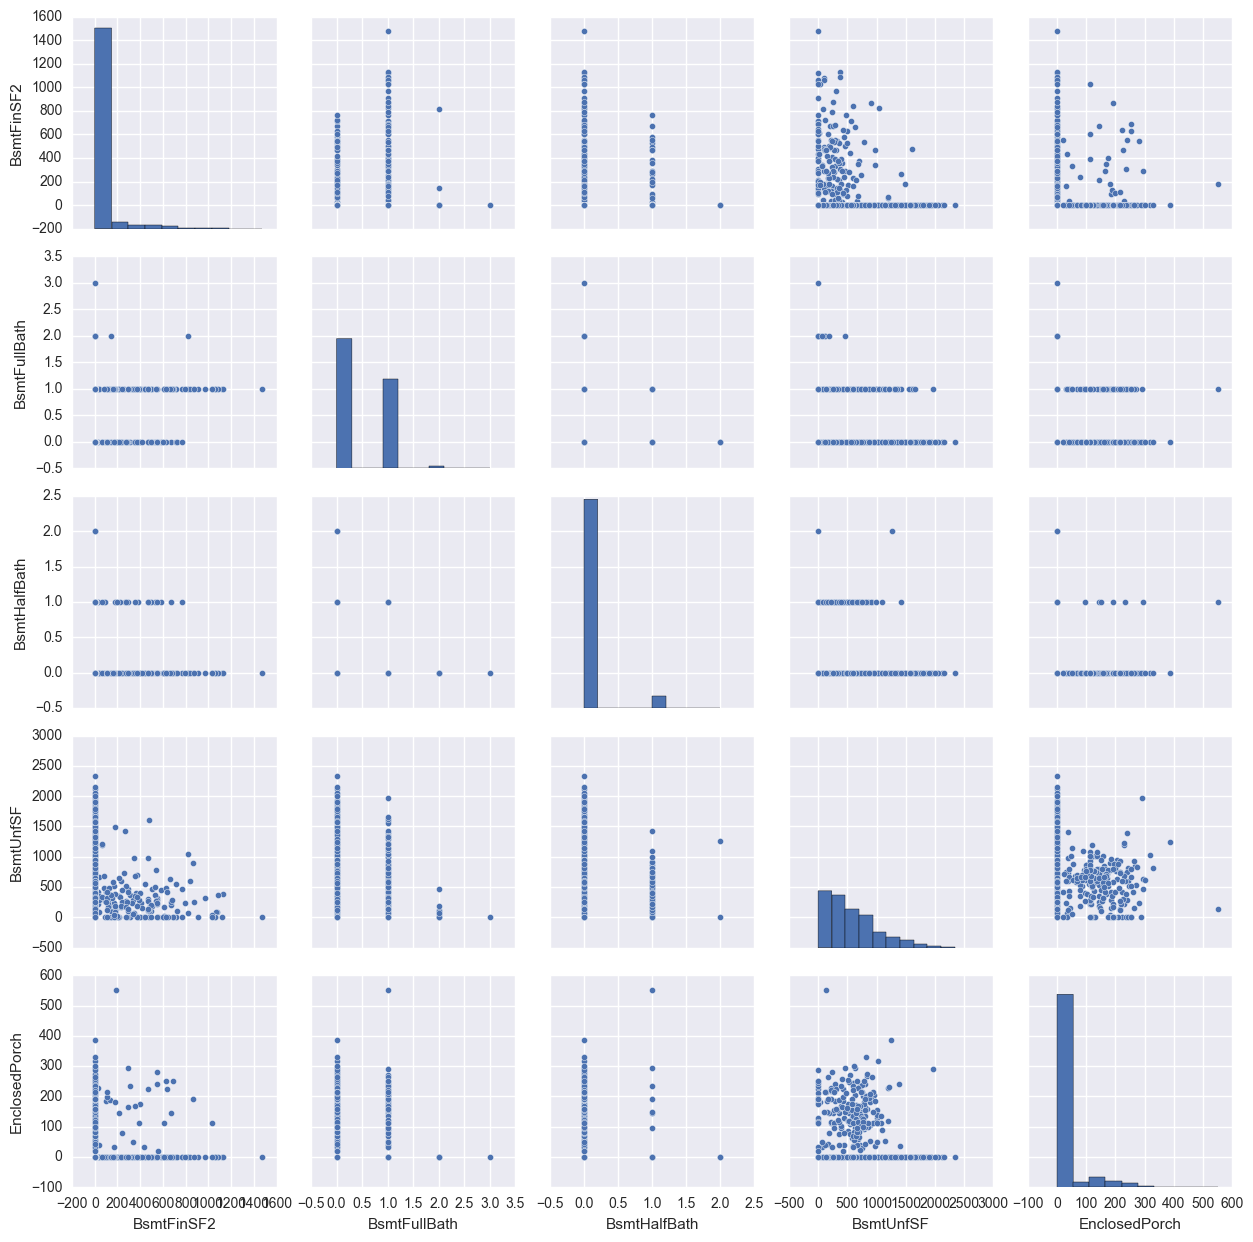

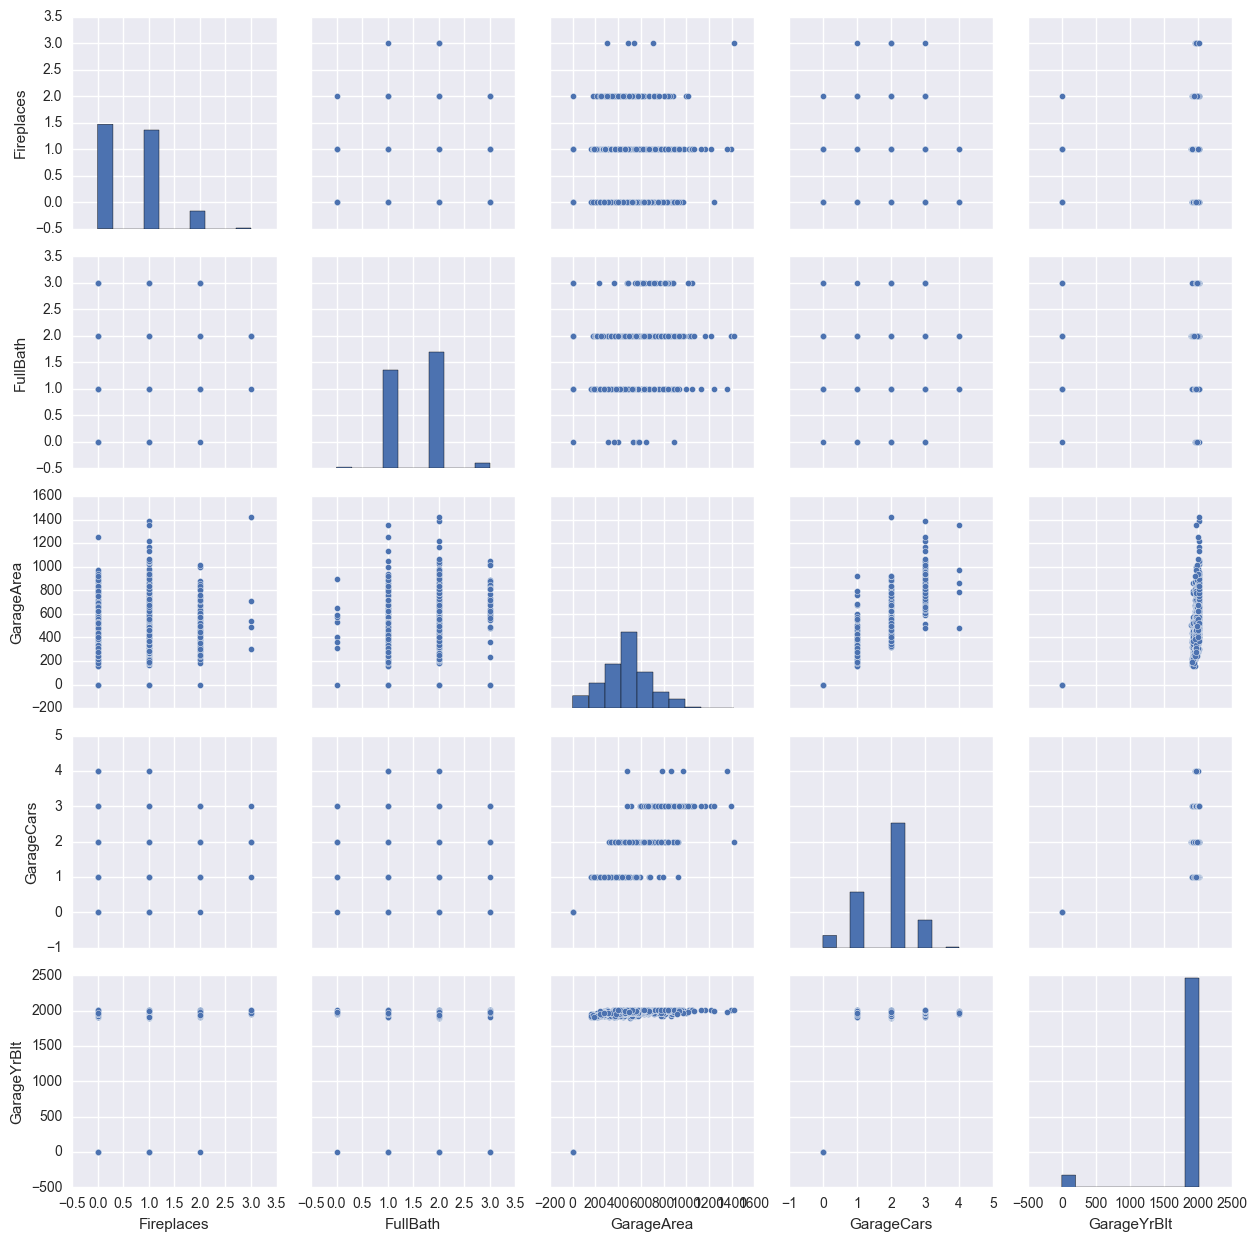

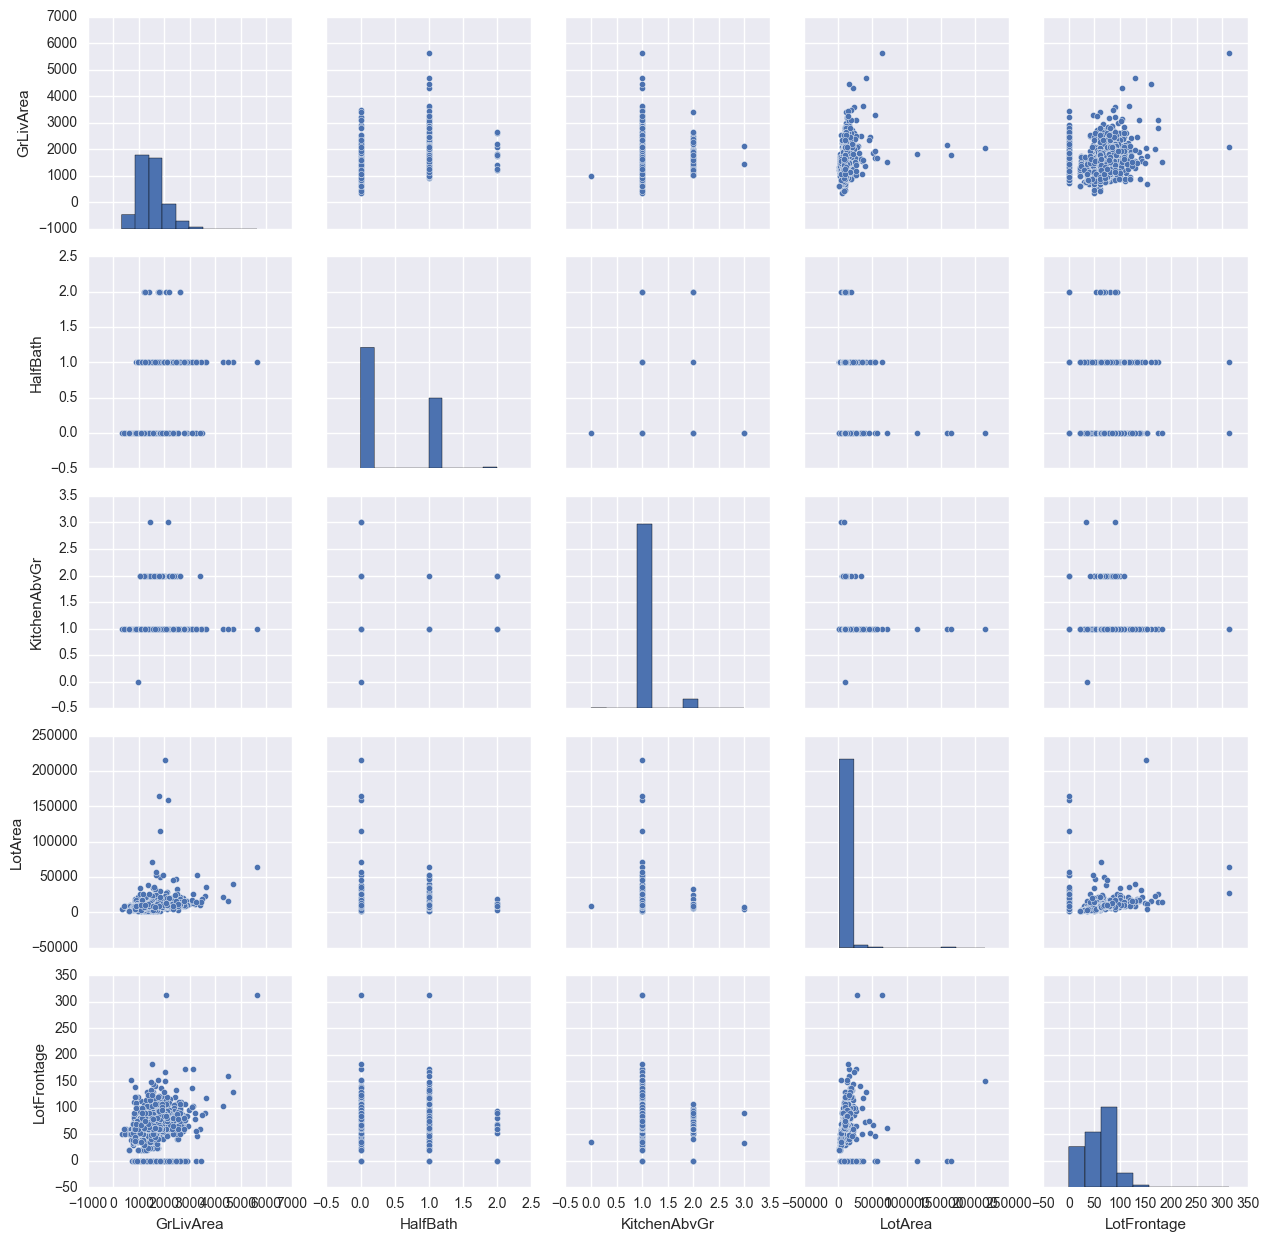

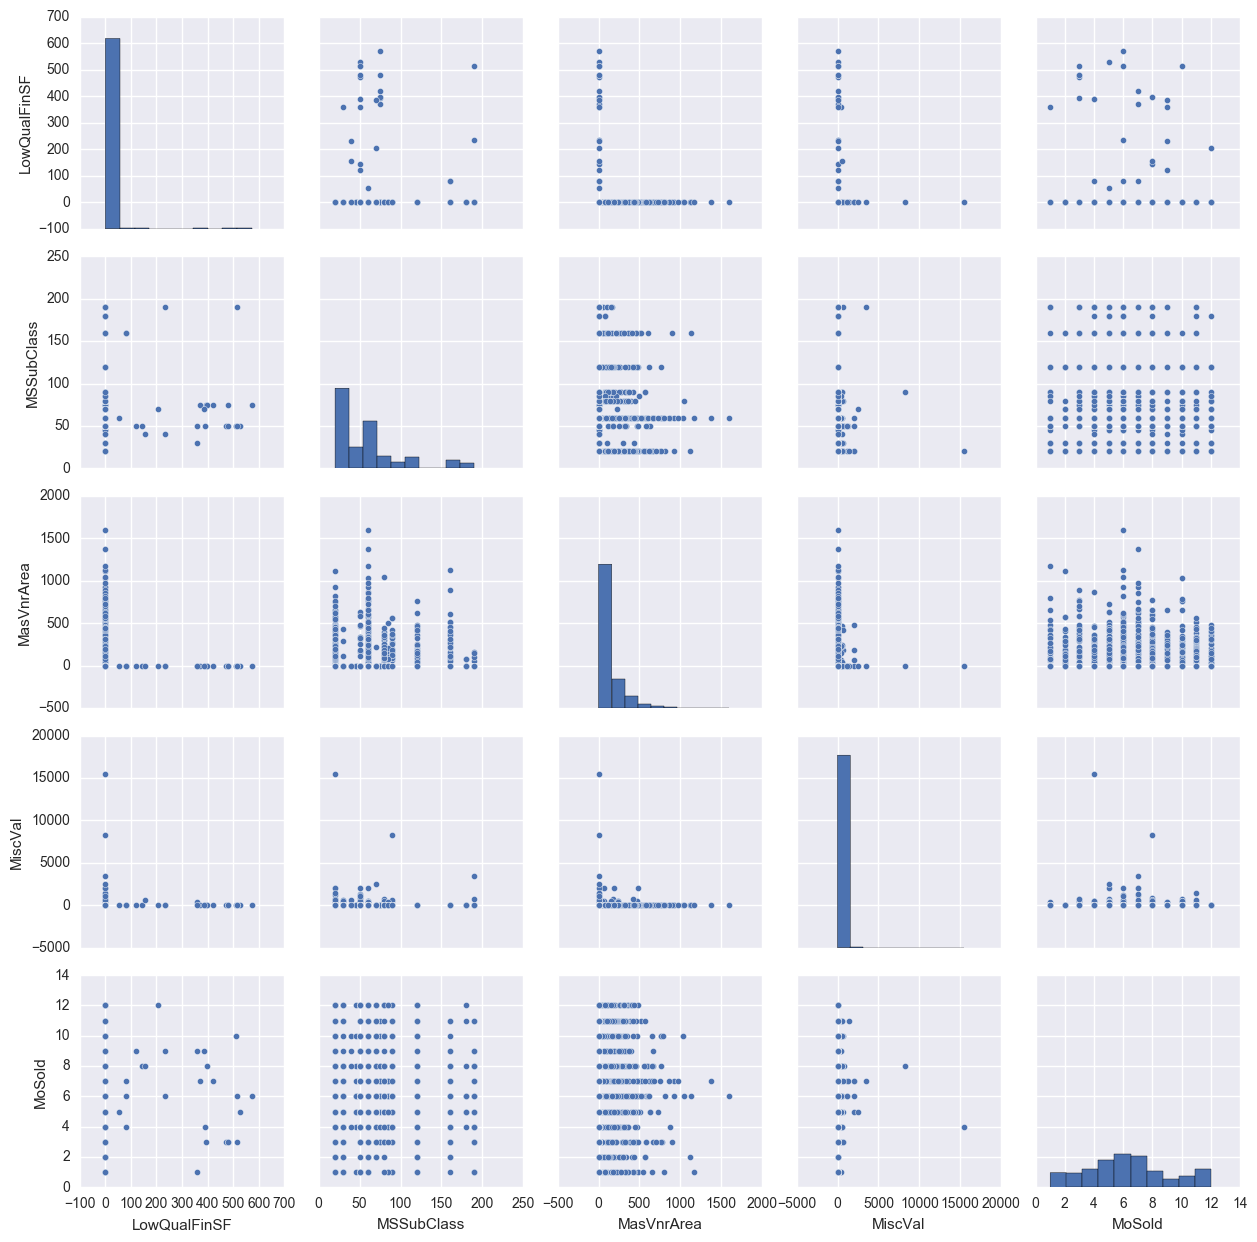

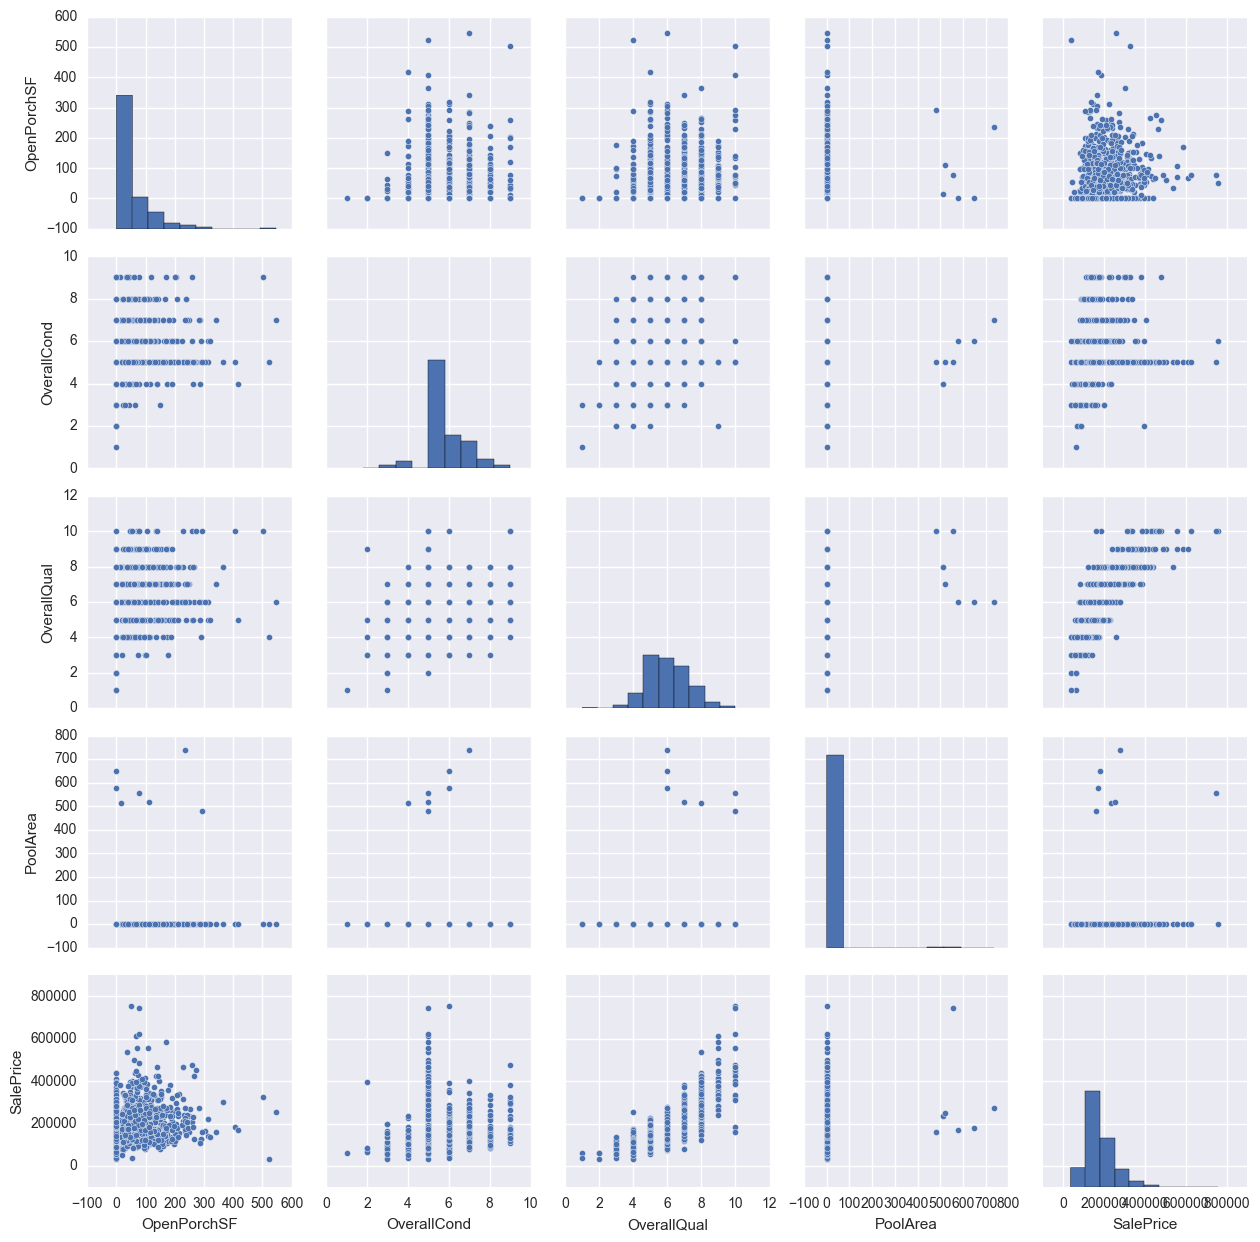

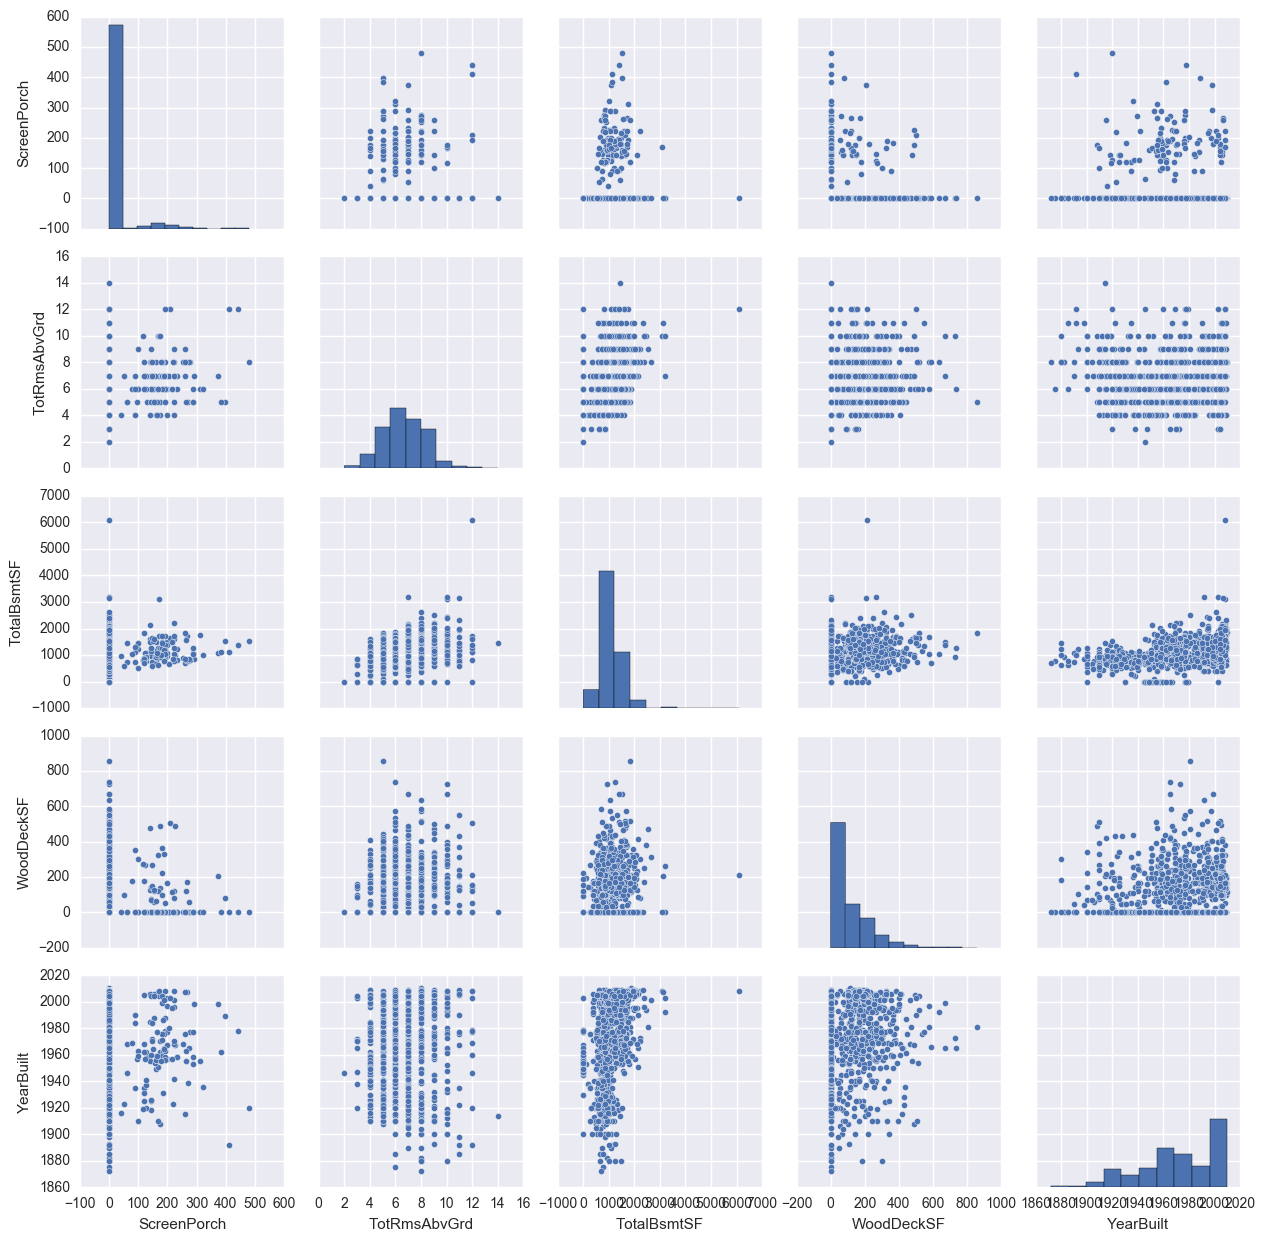

In [97]:
# we can check seperation and distribution via pairplot
x = df.select_dtypes(include=[np.number]).sort_index(axis=1).drop('Id',axis=1).fillna(0)
j=0
for i in range(5,x.shape[1]+1,5):
    cols = list(x.columns.values)[j:i]
    print(cols)
    sns.pairplot(x[cols],diag_kind='kde')
    
    j=i

### Correlation between Numeric Variables

In [68]:
# compute the correlation matrix
corr = df.select_dtypes(include=[np.number]).corr()

In [67]:
# display highly correlated figures abs(corr) > n
n = .5
corr[(abs(corr) > n) & (corr != 1)].dropna(how='all',axis=(0,1)).fillna('')

,OverallQual,YearBuilt,YearRemodAdd,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,GarageYrBlt,GarageCars,GarageArea,SalePrice
OverallQual,,0.572323,0.550684,,0.537808,,,0.593007,,0.5506,,,,0.547766,0.600671,0.562022,0.790982
YearBuilt,0.572323,,0.592855,,,,,,,,,,,0.825667,0.53785,,0.522897
YearRemodAdd,0.550684,0.592855,,,,,,,,,,,,0.642277,,,0.507101
BsmtFinSF1,,,,,0.522396,,,,0.649212,,,,,,,,
TotalBsmtSF,0.537808,,,0.522396,,0.81953,,,,,,,,,,,0.613581
1stFlrSF,,,,,0.81953,,,0.566024,,,,,,,,,0.605852
2ndFlrSF,,,,,,,,0.687501,,,0.609707,0.502901,0.616423,,,,
GrLivArea,0.593007,,,,,0.566024,0.687501,,,0.630012,,0.52127,0.825489,,,,0.708624
BsmtFullBath,,,,0.649212,,,,,,,,,,,,,
FullBath,0.5506,,,,,,,0.630012,,,,,0.554784,,,,0.560664


In [123]:
sns.pairplot?

### Correlation and Clustering
https://web.archive.org/web/20150404034126/http://stanford.edu/~mwaskom/software/seaborn/tutorial/dataset_exploration.html
http://stackoverflow.com/questions/34572177/labels-for-clustermap-in-seaborn

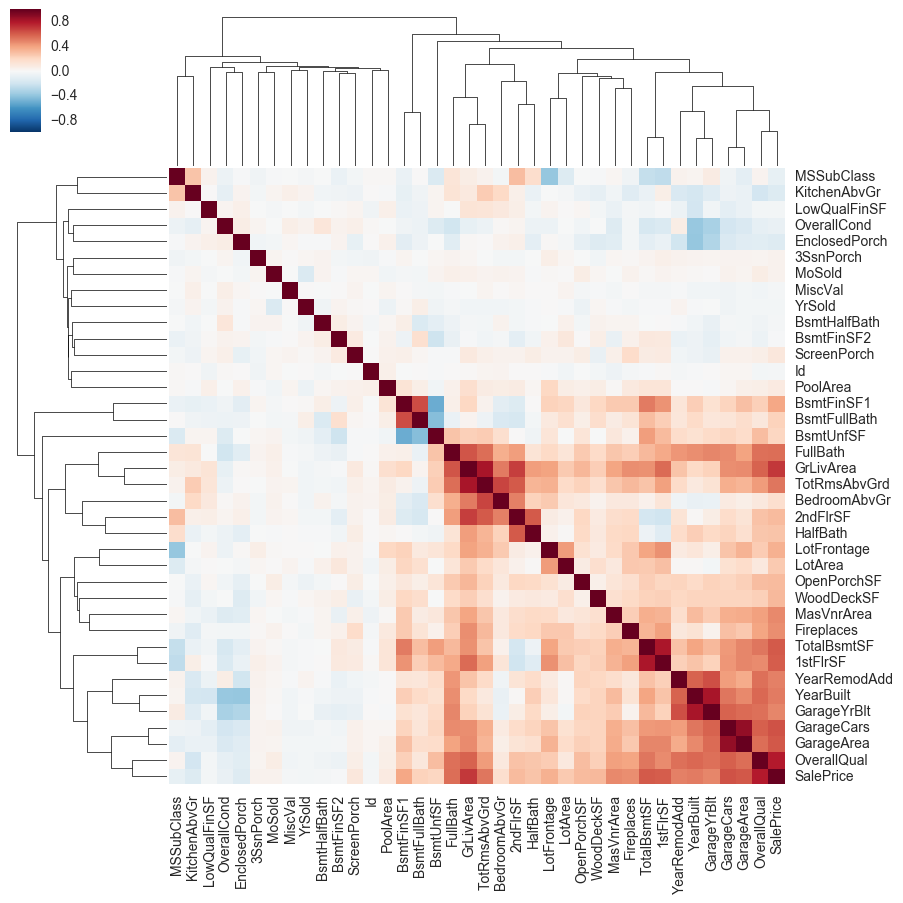

In [46]:
cg = sns.clustermap(corr)
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.show()

In [72]:
# # to understand the hierarchical clustering distance values
# print('Columns')
# print(cg.dendrogram_col.linkage) # linkage matrix for columns
# print('Rows')
# print(cg.dendrogram_row.linkage) # linkage matrix for rows

### Attepnt to Visualize Top Correlated Params with Target by Category

In [103]:
# lets see which values are most highly correlated with SalesPrice
target_corr = corr['SalePrice'].sort_values(ascending=False)
display(target_corr)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

In [126]:
# display(df.BldgType.value_counts())
# display(df.Neighborhood.value_counts())
# display(df.HouseStyle.va8lue_counts())

['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'SalePrice', 'Neighborhood']
['TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'SalePrice', 'Neighborhood']
['YearRemodAdd', 'GarageYrBlt', 'MasVnrArea', 'Fireplaces', 'BsmtFinSF1', 'SalePrice', 'Neighborhood']


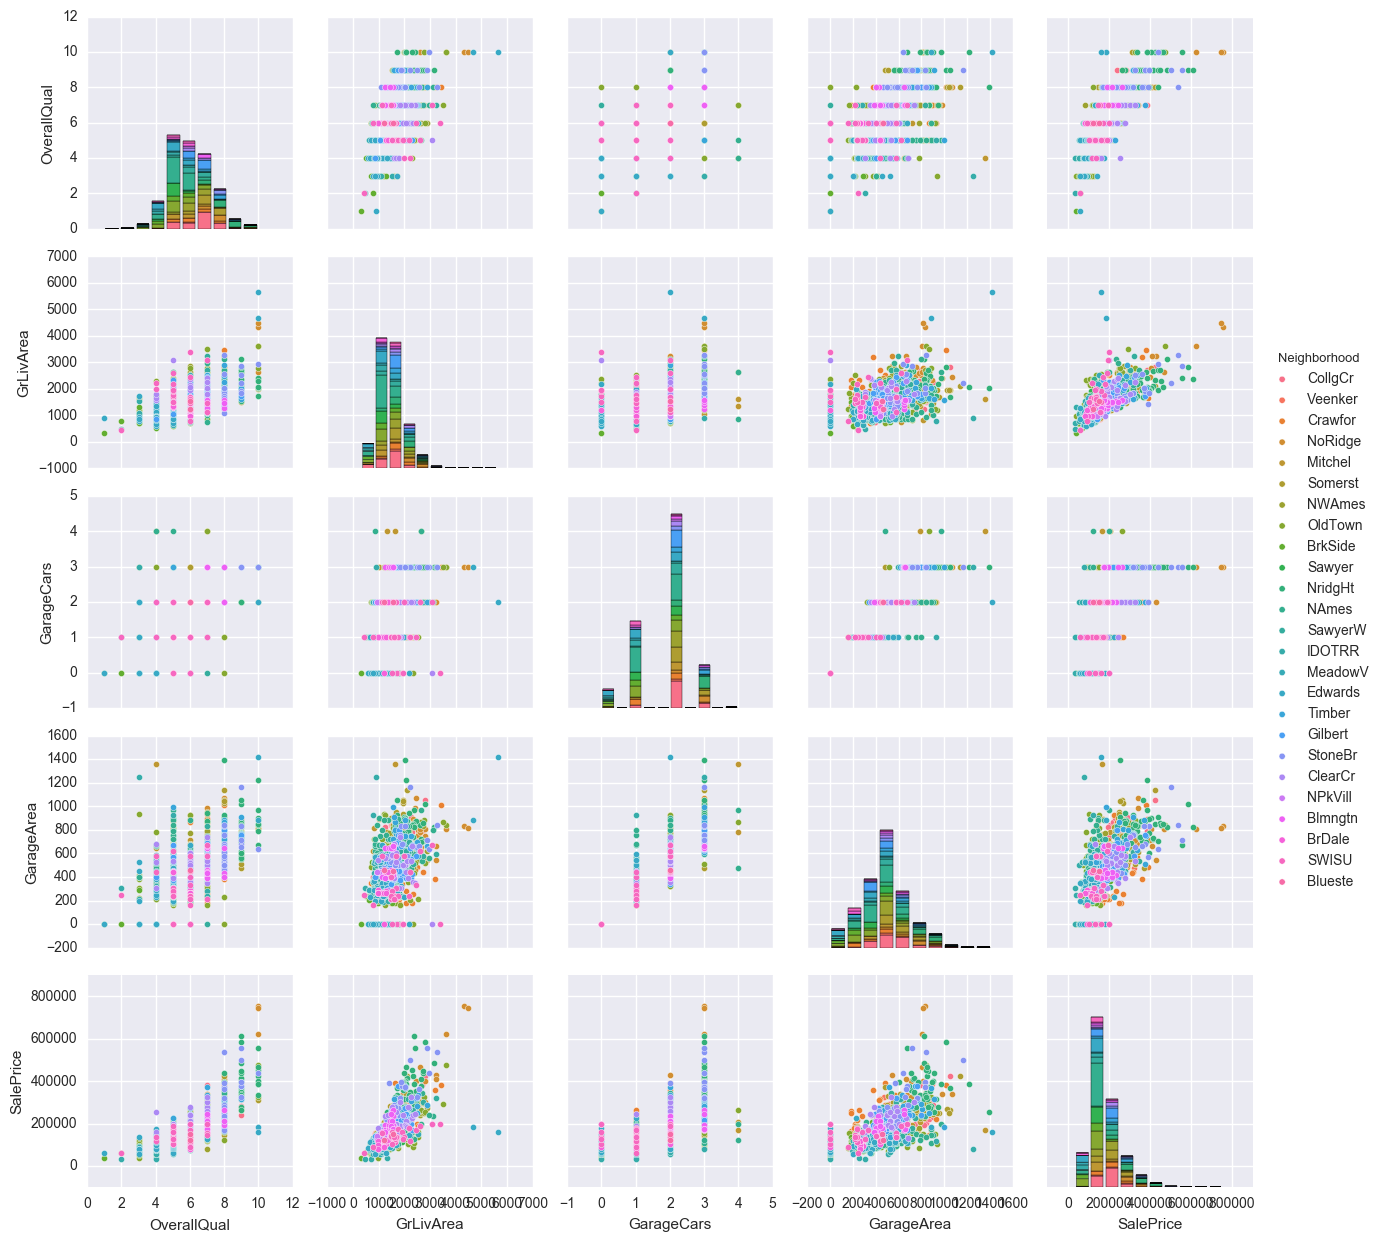

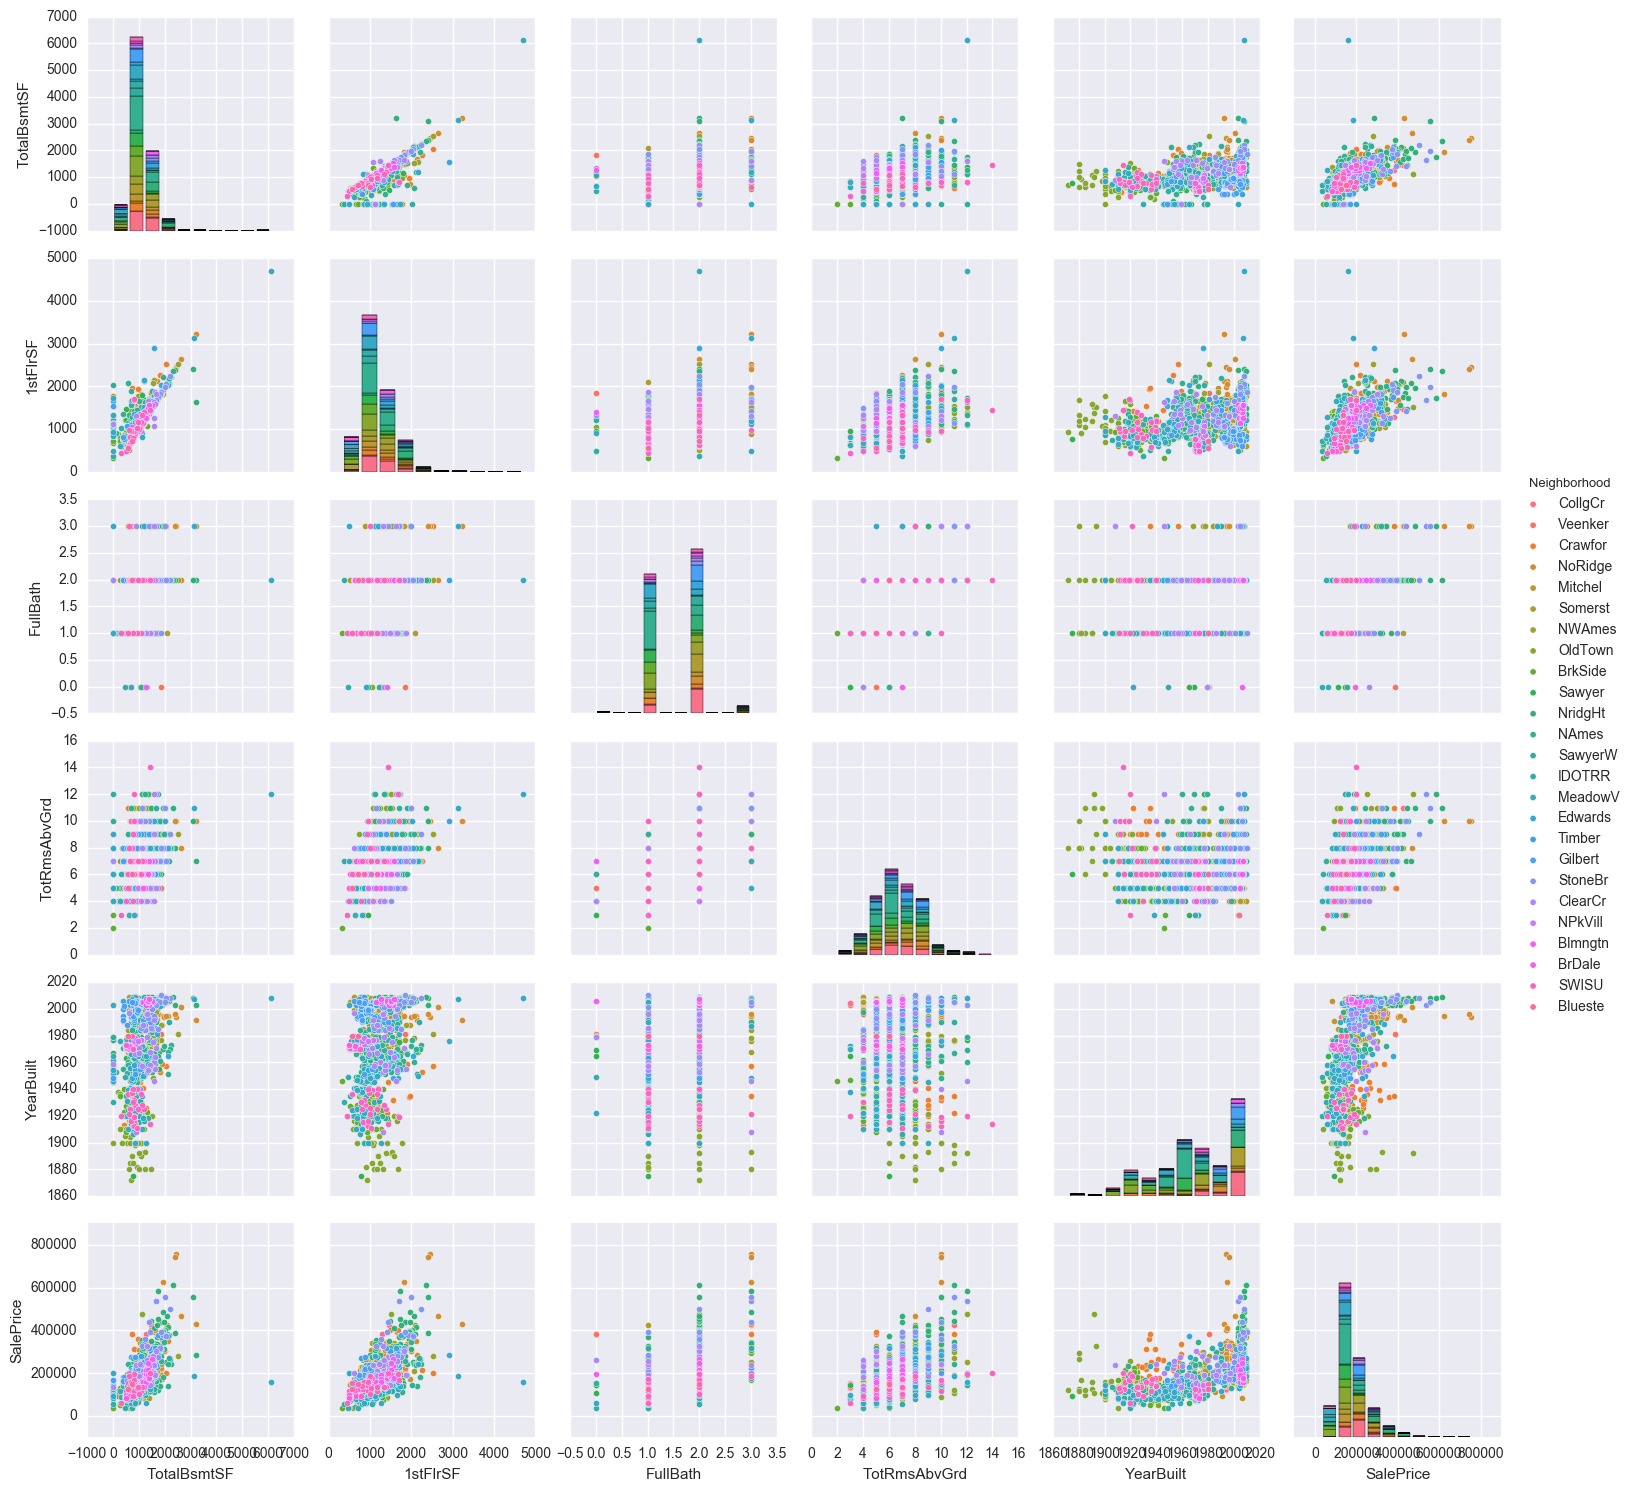

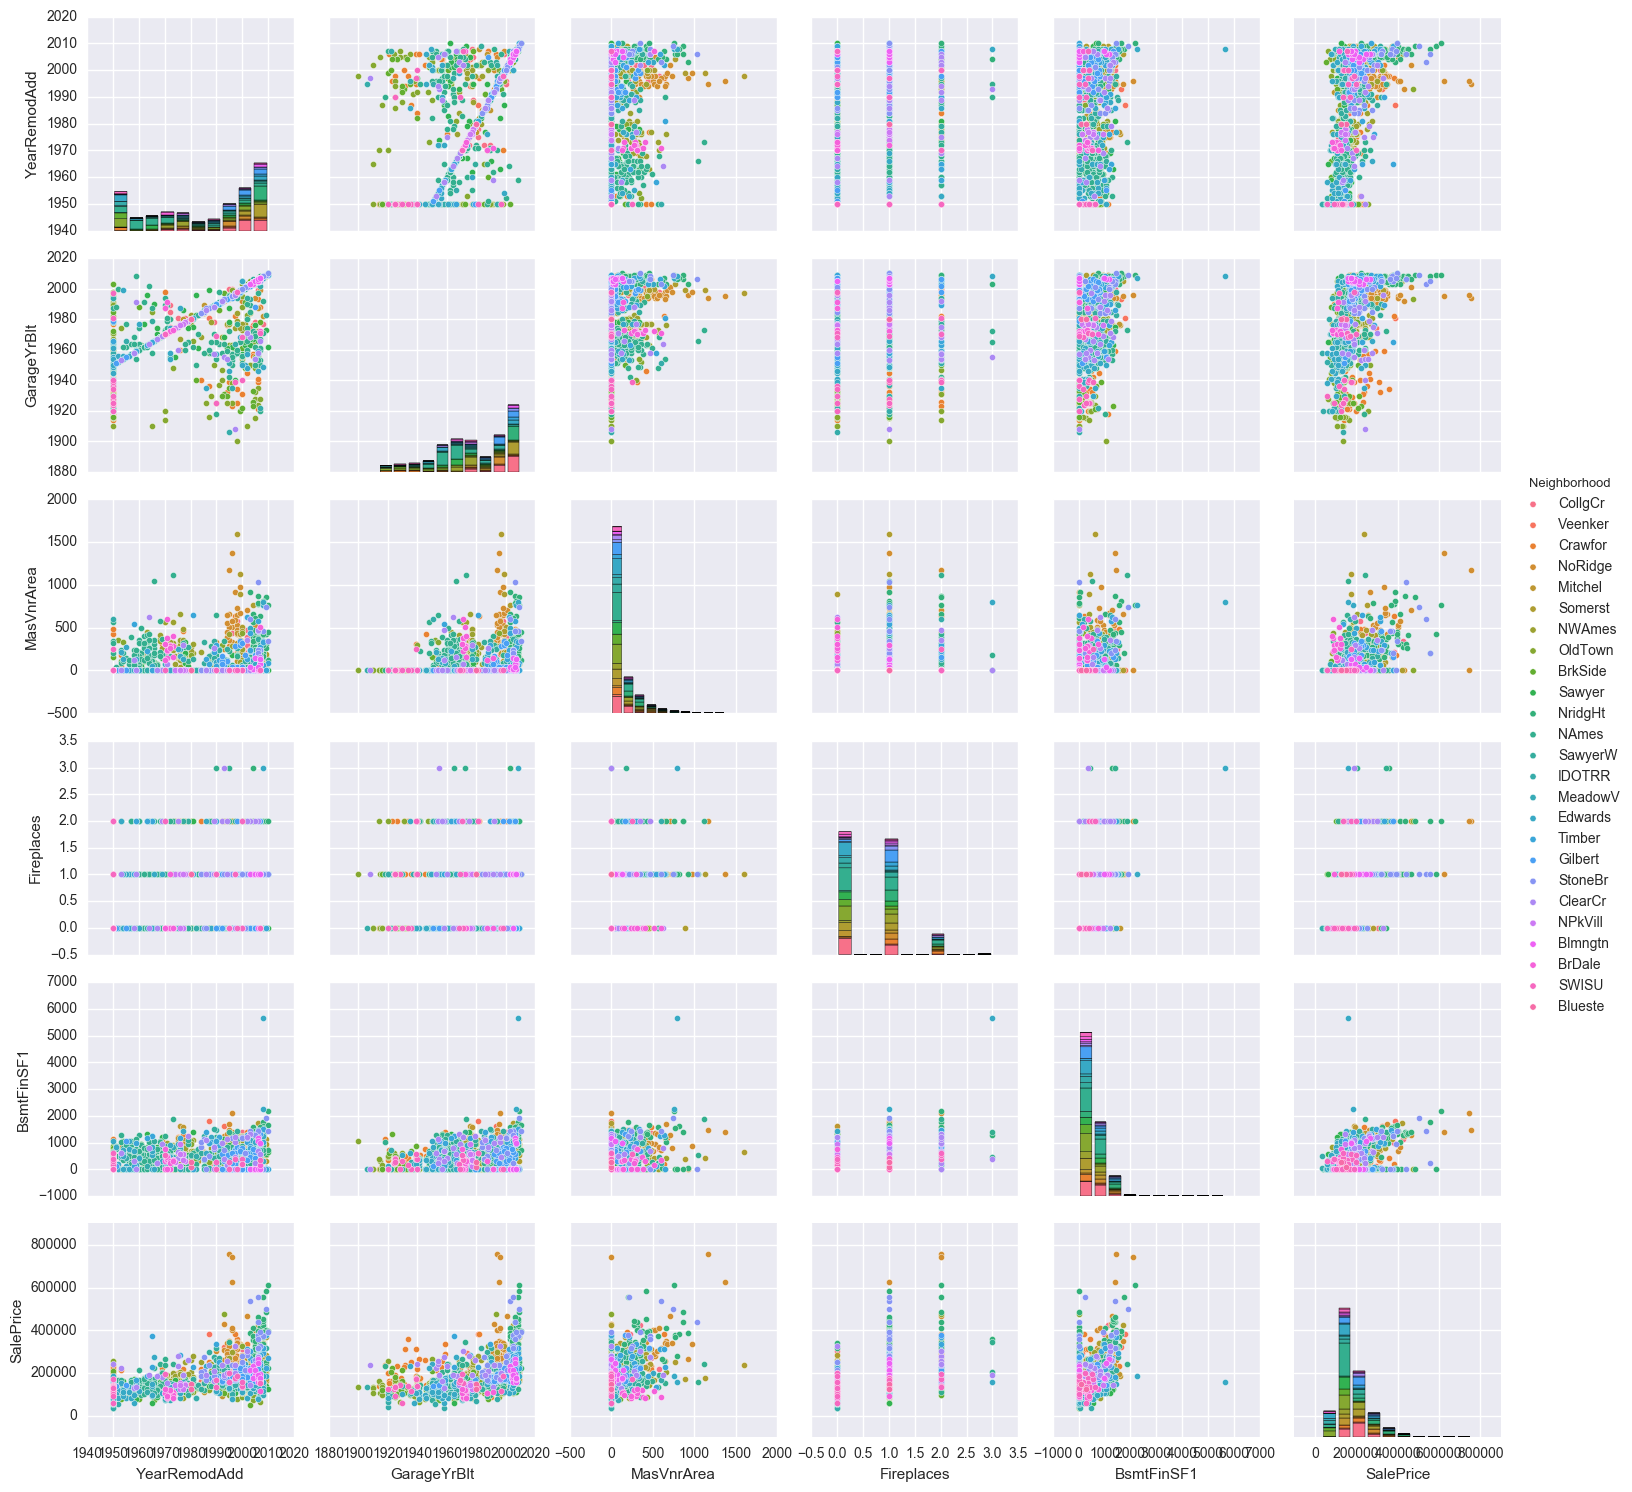

In [125]:
# lets display the top 15 as a pairplot to try and identify any trends
# Candidates for category are"Neighborhood" and "HouseStyle"

j=1
for i in range(5,16,5):
    cols =list(target_corr.index.values)[j:i]
    cols.append('SalePrice')
    cols.append('Neighborhood')
    print(cols)
    sns.pairplot(df[cols],hue='Neighborhood')
    j=i
